In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

## 1. Generating noise

In [2]:
img = cv2.imread('1.jpg')

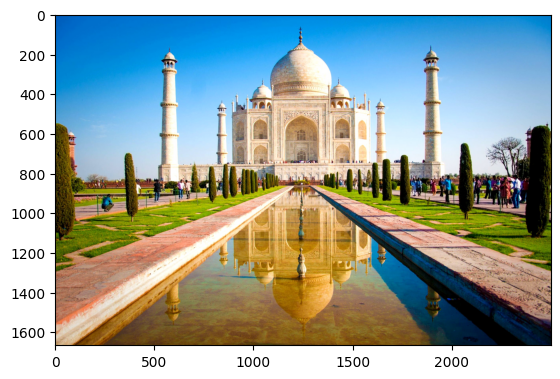

In [3]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

### (i) Uniform Noise

In [4]:
def add_uniform_noise(image, intensity):
    noise = np.random.uniform(low=-intensity, high=intensity, size=image.shape)
    noisy_image = np.clip(image + noise, 0, 255).astype(np.uint8)
    return noisy_image

uniform_noise_intensity = 100
noisy_uniform_img = add_uniform_noise(img, uniform_noise_intensity)

### (ii) Gaussian Noise

In [5]:
gaussian_noise = np.random.normal(0, 25, img.shape).astype(np.uint8)
noisy_gaussian_img = cv2.add(img, gaussian_noise)

### (iii) Salt and Pepper Noise

In [6]:
def add_salt_and_pepper_noise(image, salt_prob, pepper_prob):
    noisy_image = image.copy()
    # Add salt noise
    salt_mask = np.random.rand(*image.shape[:2]) < salt_prob
    noisy_image[salt_mask] = [255, 255, 255]
    # Add pepper noise
    pepper_mask = np.random.rand(*image.shape[:2]) < pepper_prob
    noisy_image[pepper_mask] = [0, 0, 0]
    return noisy_image

salt_and_pepper_prob = 0.15
noisy_salt_and_pepper_img = add_salt_and_pepper_noise(img, 0.15, 0.15)

In [7]:
blurred_img = cv2.GaussianBlur(noisy_uniform_img, (5, 5), 0)

median_blurred_img = cv2.medianBlur(noisy_salt_and_pepper_img, 5)

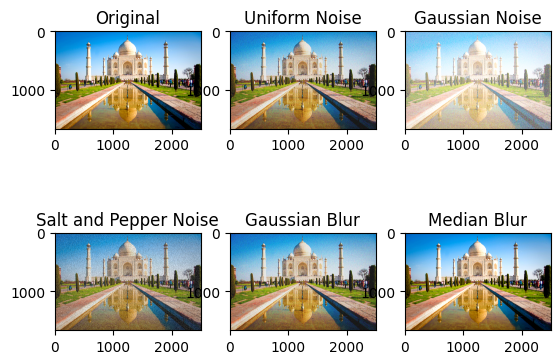

In [8]:
plt.subplot(2, 3, 1), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Original')
plt.subplot(2, 3, 2), plt.imshow(cv2.cvtColor(noisy_uniform_img, cv2.COLOR_BGR2RGB)), plt.title('Uniform Noise')
plt.subplot(2, 3, 3), plt.imshow(cv2.cvtColor(noisy_gaussian_img, cv2.COLOR_BGR2RGB)), plt.title('Gaussian Noise')
plt.subplot(2, 3, 4), plt.imshow(cv2.cvtColor(noisy_salt_and_pepper_img, cv2.COLOR_BGR2RGB)), plt.title('Salt and Pepper Noise')
plt.subplot(2, 3, 5), plt.imshow(cv2.cvtColor(blurred_img, cv2.COLOR_BGR2RGB)), plt.title('Gaussian Blur')
plt.subplot(2, 3, 6), plt.imshow(cv2.cvtColor(median_blurred_img, cv2.COLOR_BGR2RGB)), plt.title('Median Blur')

plt.show()

## 2. (i) Improving Contrast with Filtering

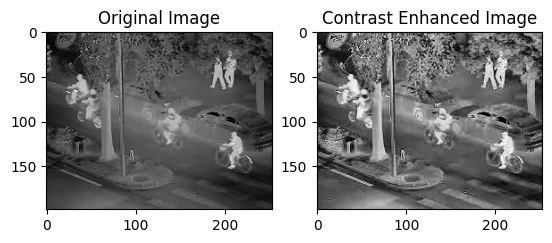

In [10]:
night_vision_img = cv2.imread('NightVision.jpg', cv2.IMREAD_GRAYSCALE)

# Contrast Limited Adaptive Histogram Equalization
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
contrast_enhanced_img = clahe.apply(night_vision_img)

plt.subplot(1, 2, 1), plt.imshow(night_vision_img, cmap='gray'), plt.title('Original Image')
plt.subplot(1, 2, 2), plt.imshow(contrast_enhanced_img, cmap='gray'), plt.title('Contrast Enhanced Image')

plt.show()

### (ii) Histogram of the image

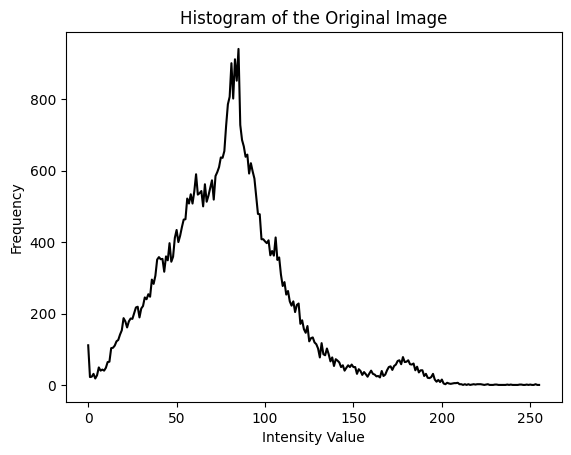

In [11]:
hist, bins = np.histogram(night_vision_img.flatten(), 256, [0, 256])
plt.plot(hist, color='black')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')
plt.title('Histogram of the Original Image')
plt.show()

### (iii) Histogram equalization and matching

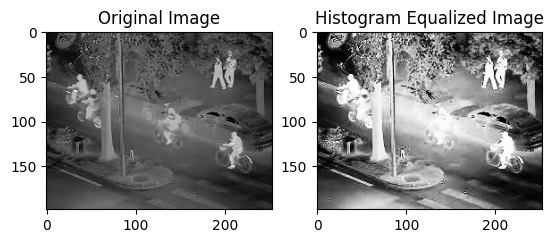

In [12]:
hist_equalized_img = cv2.equalizeHist(night_vision_img)

plt.subplot(1, 2, 1), plt.imshow(night_vision_img, cmap='gray'), plt.title('Original Image')
plt.subplot(1, 2, 2), plt.imshow(hist_equalized_img, cmap='gray'), plt.title('Histogram Equalized Image')

plt.show()